In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
# generating sample data 
x_data = np.array([35.,38.,31.,20.,22.,25.,17.,60.,8.,60.])
y_data = 2*x_data+50+np.random.random()

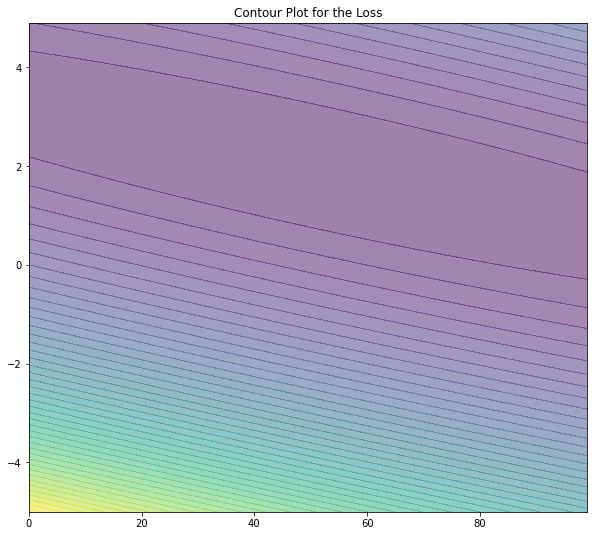

In [3]:
# plot the landscape of the loss function
# bias
bb = np.arange(0,100,1)
# weights 
ww = np.arange(-5 ,5 ,0.1)
# loss function
Z = np.zeros((len(bb) ,len(ww)))


for i in range(len(bb)):
    for j in range(len(ww)):
        #bias
        b =bb[i]
        #weights
        w = ww[j]
        #loss
        Z[j][i] =0
        
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i]+(w*x_data[n]+b-y_data[n])**2
            
            

plt.figure(figsize = (10,9))  
plt.title('Contour Plot for the Loss')
plt.contourf(bb , ww , Z,50 , alpha = 0.5 )
plt.savefig("ContourPlot.png")

In [4]:
# calculate the loss
def meanSqrError(y, pred):
    MSE = np.sum((y - pred) ** 2) / len(y)
    return MSE

In [5]:
# make predictions
def forward_prop(X, m, b):
    
    y_pred = m * X + b
    
    return y_pred

In [6]:

# Building the model using the gradient approach
def updateParams(b = 0 , w = 0 , lr = 0.0001 ,epochs = 100000):
    X = x_data
    Y = y_data
    b_hist = []
    w_hist = []
    #number of elements
    n = float(len(X))
    # Perform the gradient discent using  
    for i in range(epochs):
        # The current predicted value of Y
        #Y_pred = w*X + b
        Y_pred = forward_prop(X, w, b)
        # Derivative for weight(w) for updating the w 
        D_w = (-2/n) * sum(X * (Y - Y_pred))  
        #deriavative for bias(b) to update it
        D_b = (-2/n) * sum(Y - Y_pred)
        # Update bias
        w = w - lr * D_w
        # Update weight
        b = b - lr * D_b
        b_hist.append(b)
        w_hist.append(w)
        loss = meanSqrError(Y , Y_pred)
        #print(f"Loss  at  {i } epoch  and lr of {lr}  is {loss}")
    print(f"Loss  at  {i+1 } epoch  and lr of {lr}  is {loss}")
        
    return (w , b , w_hist , b_hist)


In [7]:
w , b , w_hist , b_hist= updateParams()

Loss  at  100000 epoch  and lr of 0.0001  is 0.10721231398209578


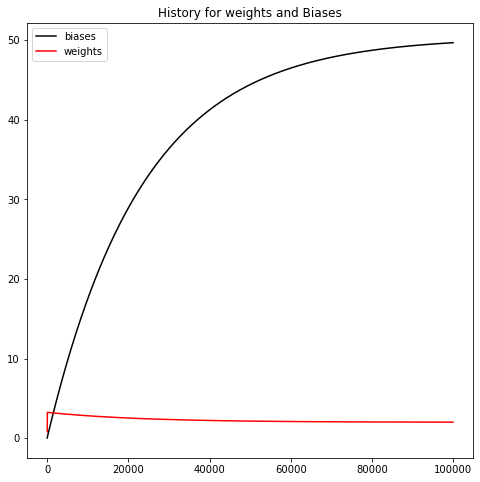

In [8]:

plt.figure(figsize = (8,8))
plt.plot(b_hist  ,color = 'black' , label = 'biases')
plt.plot( w_hist , color = 'red' , label = 'weights')
plt.title("History for weights and Biases")
plt.legend()
plt.savefig("HistBiasWei.png")

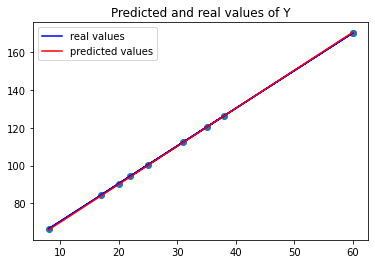

In [9]:
def PlotCurrentPreds(X , Y  , w , b):
    Y_pred =forward_prop(X, w, b)
    plt.scatter(X, Y) 
    #original line
    plt.plot(X , Y , color = 'blue' , label = 'real values')
    #predicted line
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red' , label = 'predicted values')  
    plt.title("Predicted and real values of Y")
    plt.legend()
    plt.savefig("finalModel.png")
    plt.show()
    
PlotCurrentPreds(x_data , y_data , w , b)

Loss  at  1000 epoch  and lr of 0.0001  is 495.80182277788236


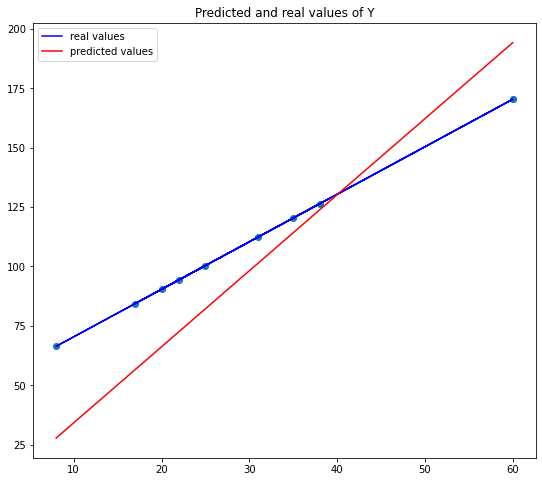

Loss  at  10000 epoch  and lr of 0.0001  is 230.20806411942561


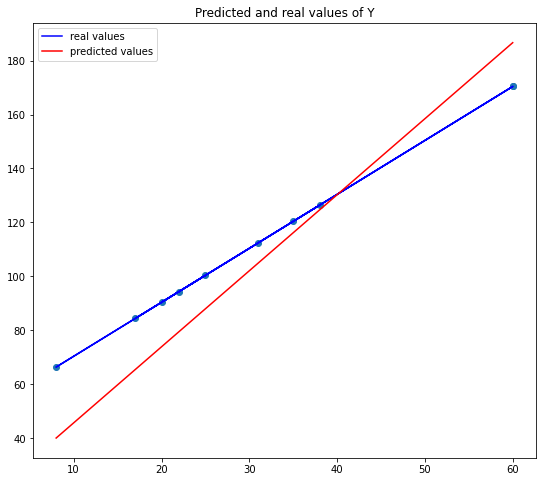

Loss  at  100000 epoch  and lr of 0.0001  is 0.10721231398209578


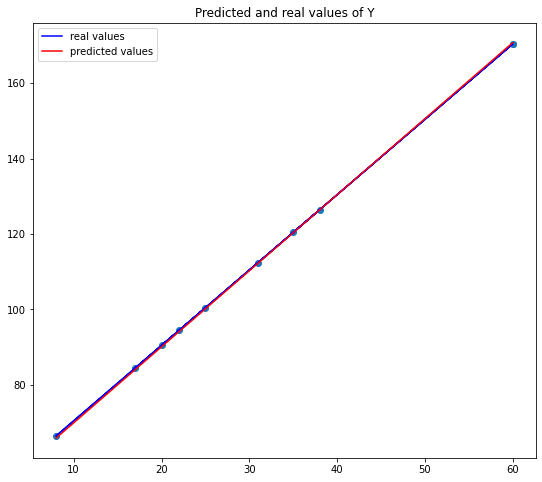

In [10]:
# testing different values of leraning rates
lrs = [0.0001 , 0.0001 , 0.0001]
epo = [1000 , 10000 , 100000]

for i in range(3):
    w , b , w_hist , b_hist= updateParams(lr = lrs[i] , epochs = epo[i])
    plt.figure(figsize = (9,8))
    PlotCurrentPreds(x_data , y_data , w , b)

Loss  at  100000 epoch  and lr of 0.0001  is 0.10721231398209578


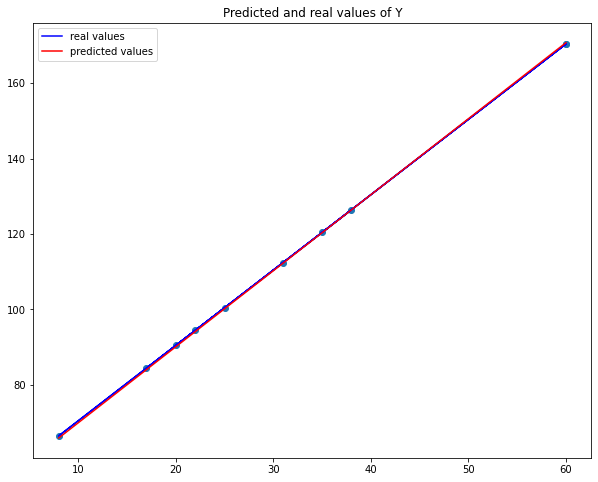

In [11]:
# we found the lr of 0.0001 and epochs 100000 to acccurately predicts
#lets used it for our model
w , b , w_hist , b_hist= updateParams(lr = 0.0001 , epochs = 100000)
plt.figure(figsize = (10,8))
PlotCurrentPreds(x_data , y_data , w , b)
